# Model construction:

The `compute_color_histogram` function is included at the top. It takes an image as input and returns the color histogram as a flattened array, calculated using the RGB color space.

Inside the `preprocess_images` function, after loading and resizing each image, the `compute_color_histogram` function is called to compute the color histogram for the image. The resulting histogram is then appended to the `images` list.

The rest of the code remains the same, where the image histograms are used as features (`X_train` and `X_test`) for training and evaluating the Random Forest classifier (`clf`).

Make sure to adjust the `image_dir` and `image_size` variables to match your specific dataset.

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from skimage import feature

## Experiment 1: Image processing technique:

### Color Histograms:

In [ ]:
def compute_color_histogram(image, bins=(8, 8, 8)):
    computed_hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    norm_hist = cv2.normalize(computed_hist, computed_hist)
    return norm_hist.flatten()


def preprocess_images(image_dir, image_size, class_names):
    processed_images = []
    image_labels = []
    leaf_categories = os.listdir(image_dir)
    class_labels = class_names
    for leaf_category in leaf_categories:
        leaf_category_dir = os.path.join(image_dir, leaf_category)
        for class_label in class_labels:
            class_dir = os.path.join(leaf_category_dir, class_label)
            leaf_images = os.listdir(class_dir)
            for leaf_image in leaf_images:
                image_dir_path = os.path.join(class_dir, leaf_image)
                leaf_image = cv2.imread(image_dir_path)
                res_image = cv2.resize(leaf_image, image_size)
                image_hist = compute_color_histogram(res_image)
                processed_images.append(image_hist)
                image_labels.append(class_label)
    processed_images = np.array(processed_images)
    image_labels = np.array(image_labels)
    return processed_images, image_labels

dataset_dir = "./leaf_dataset_small"
imageSize = (600, 400)
classNames = ['healthy','diseased']

# Preprocess the images
leafImages, labels = preprocess_images(dataset_dir, imageSize, classNames)

X_train, X_test, y_train, y_test = train_test_split(leafImages, labels, test_size=0.2, random_state=42)

**Decision Tree Classifier:**

In [ ]:
start = time.time()
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
dt_time = time.time() - start
print("Time taken to train",round(dt_time,3),"ms")

accuracy_dt = dtclf.score(X_test, y_test)
print("Accuracy:", accuracy_dt)


y_pred_dt = dtclf.predict(X_test)
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=classNames,output_dict=True)

Time taken to train 0.147 ms
Accuracy: 0.8125


In [ ]:
classification_report_dt = pd.DataFrame(classification_report_dt).transpose()
classification_report_dt = classification_report_dt.iloc[3:4,:]
classification_report_dt

,precision,recall,f1-score,support
macro avg,0.812716,0.813705,0.812385,848.0


**Support Vector Classifier:**

In [ ]:
start = time.time()
clfsvc = SVC()

clfsvc.fit(X_train, y_train)
accuracy_svc = clfsvc.score(X_test, y_test)
svc_time = time.time() - start
print("Time taken to train",round(svc_time,3),"ms")
print("Accuracy:", accuracy_svc)

y_pred_svc = clfsvc.predict(X_test)
classification_report_svc = classification_report(y_test, y_pred_svc, target_names=classNames,output_dict=True)

Time taken to train 2.621 ms
Accuracy: 0.7535377358490566


In [ ]:
classification_report_svc = pd.DataFrame(classification_report_svc).transpose()
classification_report_svc = classification_report_svc.iloc[3:4,:]
classification_report_svc

,precision,recall,f1-score,support
macro avg,0.759073,0.757232,0.753414,848.0


### Pixel Intensity: 

The Pixel Intensity function is less sophisticated than the colour histograms function as it receives an image as input and returns a 1D array (flattened version) of the 2D grayscale image.

In [ ]:
def calculate_intensity(input_image):
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    return gray_image.flatten()

def preprocess_images(image_dir, image_size, class_names):
    processed_images = []
    image_labels = []
    leaf_categories = os.listdir(image_dir)
    class_labels = class_names
    for leaf_category in leaf_categories:
        leaf_category_dir = os.path.join(image_dir, leaf_category)
        for class_label in class_labels:
            class_dir = os.path.join(leaf_category_dir, class_label)
            leaf_images = os.listdir(class_dir)
            for leaf_image in leaf_images:
                image_dir_path = os.path.join(class_dir, leaf_image)
                leaf_image = cv2.imread(image_dir_path)
                res_image = cv2.resize(leaf_image, image_size)
                image_intensity = calculate_intensity(res_image)
                processed_images.append(image_intensity)
                image_labels.append(class_label)
    processed_images = np.array(processed_images)
    image_labels = np.array(image_labels)
    return processed_images, image_labels


dataset_dir = "./leaf_dataset_small"
classNames = ['healthy','diseased']
imageSize = (100, 100)  # Reduced the image resolution as the model took a veary large amount of time to run

# Preprocess the images
leafImages, labels = preprocess_images(dataset_dir, imageSize, classNames)

X_train, X_test, y_train, y_test = train_test_split(leafImages, labels, test_size=0.2, random_state=42)

**Decision Tree Classifier:**

In [ ]:
start = time.time()
dtclf = DecisionTreeClassifier(max_depth=10, random_state=42)  # Prune the tree and use parallel processing
dtclf.fit(X_train, y_train)
dt_time = time.time() - start
print("Time taken to train",round(dt_time,3),"ms")

accuracy_dt = dtclf.score(X_test, y_test)
print("Accuracy:", accuracy_dt)

y_pred_dt = dtclf.predict(X_test)
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=classNames,output_dict=True)

Time taken to train 10.134 ms
Accuracy: 0.7122641509433962


In [ ]:
classification_report_dt = pd.DataFrame(classification_report_dt).transpose()
classification_report_dt = classification_report_dt.iloc[3:4,:]
classification_report_dt

,precision,recall,f1-score,support
macro avg,0.711426,0.710402,0.710718,848.0


**Support Vector Classifier:**

In [ ]:
start = time.time()
clfsvc = SVC()

clfsvc.fit(X_train, y_train)
svc_time = time.time() - start
print("Time taken to train",round(svc_time,3),"ms")
accuracy_svc = clfsvc.score(X_test, y_test)
print("Accuracy:", accuracy_svc)

y_pred_svc = clfsvc.predict(X_test)
classification_report_svc = classification_report(y_test, y_pred_svc, target_names=classNames,output_dict=True)

Time taken to train 25.984 ms
Accuracy: 0.7830188679245284


In [ ]:
classification_report_svc = pd.DataFrame(classification_report_svc).transpose()
classification_report_svc = classification_report_svc.iloc[3:4,:]
classification_report_svc

,precision,recall,f1-score,support
macro avg,0.782675,0.783527,0.782747,848.0


### Texture Features:

Moving on to the Texture Features function, it calculates the Local Binary Pattern (LBP) histogram of an input image. LBP is a texture operator which labels the pixels of an image by thresholding the neighbourhood of each pixel and considers the result as a binary number.

In [ ]:
def compute_lbp(input_image, points_count, radius_value, small_constant=1e-7):
    local_bin_pattern = feature.local_binary_pattern(input_image, points_count, radius_value, method="uniform")
    (histogram, _) = np.histogram(local_bin_pattern.ravel(), bins=np.arange(0, points_count + 3), range=(0, points_count + 2))

    histogram = histogram.astype("float")
    histogram /= (histogram.sum() + small_constant)

    return histogram.flatten()


def preprocess_images(image_dir, image_size, class_names):
    processed_images = []
    image_labels = []
    leaf_categories = os.listdir(image_dir)
    class_labels = class_names
    for leaf_category in leaf_categories:
        leaf_category_dir = os.path.join(image_dir, leaf_category)
        for class_label in class_labels:
            class_dir = os.path.join(leaf_category_dir, class_label)
            leaf_images = os.listdir(class_dir)
            for leaf_image in leaf_images:
                image_dir_path = os.path.join(class_dir, leaf_image)
                leaf_image = cv2.imread(image_dir_path, cv2.IMREAD_GRAYSCALE) # LBP needs grayscale images
                res_image = cv2.resize(leaf_image, image_size)
                image_lbp = compute_lbp(res_image, points_count=24, radius_value=8)
                processed_images.append(image_lbp)
                image_labels.append(class_label)
    processed_images = np.array(processed_images)
    image_labels = np.array(image_labels)
    return processed_images, image_labels


dataset_dir = "./leaf_dataset_small"
imageSize = (600, 400)
classNames = ['healthy','diseased']

# Preprocess the images
leafImages, labels = preprocess_images(dataset_dir, imageSize, classNames)

X_train, X_test, y_train, y_test = train_test_split(leafImages, labels, test_size=0.2, random_state=42)

**Decision Tree Classifier:**

In [ ]:
start = time.time()
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
dt_time = time.time() - start
print("Time taken to train",round(dt_time,3),"ms")

accuracy_dt = dtclf.score(X_test, y_test)
print("Accuracy:", accuracy_dt)

y_pred_dt = dtclf.predict(X_test)
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=classNames,output_dict=True)

Time taken to train 0.057 ms
Accuracy: 0.6662735849056604


In [ ]:
classification_report_dt = pd.DataFrame(classification_report_dt).transpose()
classification_report_dt = classification_report_dt.iloc[3:4,:]
classification_report_dt

,precision,recall,f1-score,support
macro avg,0.669248,0.668884,0.666251,848.0


**Support Vector Classifier:**

In [ ]:
start = time.time()
clfsvc = SVC()

clfsvc.fit(X_train, y_train)
svc_time = time.time() - start
print("Time taken to train",round(svc_time,3),"ms")
accuracy_svc = clfsvc.score(X_test, y_test)
print("Accuracy:", accuracy_svc)

y_pred_svc = clfsvc.predict(X_test)
classification_report_svc = classification_report(y_test, y_pred_svc, target_names=classNames,output_dict=True)

Time taken to train 0.371 ms
Accuracy: 0.6155660377358491


In [ ]:
classification_report_svc = pd.DataFrame(classification_report_svc).transpose()
classification_report_svc = classification_report_svc.iloc[3:4,:]
classification_report_svc

,precision,recall,f1-score,support
macro avg,0.614831,0.609777,0.608235,848.0


## Experiment 2: Hyperparameter tuning:

The function takes an image and the number of bins as input parameters. The cv2.calcHist() function is used to calculate the histogram of the constituent color channels (blue, green, and red) of the image1.

The cv2.calcHist() function takes several parameters:

images: This is the image that we want to compute a histogram for.
channels: This is a list of indexes, specifying the channels for which we want to compute a histogram.
mask: This is an optional mask used to specify a region of interest.
histSize: This is a list of bin counts for each channel.
ranges: This is a list of ranges for each channel.
The function returns a flattened histogram array1.

The cv2.normalize() function normalizes the histogram so that it can be displayed as an image1.

In [ ]:
# Function to calculate color histogram
# The parameters needed to calculate the color histogram are 'image' and 'bins'.
# The image parameter specifies the input image and bins is a tuple that 
# specifies the number of bins for each channel. In this case, it is set to
# (8, 8, 8), which means that each channel will have 8 bins.

def compute_color_histogram(image, bins=(8, 8, 8)):
    # `cv2.calcHist` function is used to calculate the color histogram of the
    # image with bins specified in the previous parameters. Other parameters
    # included are: 
    # `channels` to be included to compute the histogram, in this case, it
    # is [0, 1, 2], which means that we want to compute histograms for all
    # three color channels (blue, green, and red). 
    # `ranges` is a list of ranges for each channel, in this case,
    # set to [0, 256, 0, 256, 0, 256], which means that the range for each
    # channel is from 0 to 255.
    computed_hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    norm_hist = cv2.normalize(computed_hist, computed_hist)
    return norm_hist.flatten()

In [ ]:
# Function to load and preprocess images
def preprocess_images(image_dir, image_size, class_names):
    processed_images = []
    image_labels = []
    # Get a list of subdirectories (each directory represents 
    # a leaf category)
    leaf_categories = os.listdir(image_dir)
    class_labels = class_names
    # Loop through each leaf type directory
    for leaf_category in leaf_categories:
        leaf_category_dir = os.path.join(image_dir, leaf_category)
        # Loop through each leaf label (healthy or diseased) subdirectory
        for class_label in class_labels:
            class_dir = os.path.join(leaf_category_dir, class_label)
            # Get a list of leaf images in the class subdirectory
            # (healthy or diseased)
            leaf_images = os.listdir(class_dir)
            # Iterate through each leaf image
            for leaf_image in leaf_images:
                image_dir_path = os.path.join(class_dir, leaf_image)
                # Loads the leaf image
                leaf_image = cv2.imread(image_dir_path)
                # Resizes leaf image to desired size 
                res_image = cv2.resize(leaf_image, image_size)
                # Calculate the color histogram
                image_hist = compute_color_histogram(res_image)
                # Append the histogram and label to the lists
                processed_images.append(image_hist)
                image_labels.append(class_label)
    processed_images = np.array(processed_images)
    image_labels = np.array(image_labels)
    return processed_images, image_labels

In [ ]:
dataset_dir = "./leaf_dataset_small"
imageSize = (600, 400)
classNames = ['healthy','diseased']

In [ ]:
# Preprocess the images
leafImages, labels = preprocess_images(dataset_dir, imageSize, classNames)

X_train, X_test, y_train, y_test = train_test_split(leafImages, labels, test_size=0.2, random_state=42)



### Decision Trees:

In [ ]:
dtclf = DecisionTreeClassifier()
# Define the parameter grid for grid search

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}




start = time.time()
# grid_search_dt = GridSearchCV(dtclf, param_grid, scoring='f1_macro', cv=5)
grid_search_dt = GridSearchCV(dtclf, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)


best_dt_clf = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_


accuracy_dt = best_dt_clf.score(X_test, y_test)
print("Best Parameters:", best_dt_params)
print("Accuracy:", accuracy_dt)


y_pred_dt = best_dt_clf.predict(X_test)
dt_time = time.time() - start
print("Time taken to run",round(dt_time,3),"ms")
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=classNames,output_dict=True)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.8431603773584906
Time taken to run 30.585 ms


In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_dt.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.821 (+/-0.029) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.818 (+/-0.029) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.816 (+/-0.030) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.822 (+/-0.027) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.818 (+/-0.021) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.819 (+/-0.019) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.824 (+/-0.015) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.824 (+/-0.013) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.823 (+/-0.013) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.773 (+/-0.018)

In [ ]:
classification_report_dt = pd.DataFrame(classification_report_dt).transpose()
classification_report_dt

,precision,recall,f1-score,support
healthy,0.823245,0.850000,0.836408,400.00000
diseased,0.862069,0.837054,0.849377,448.00000
accuracy,0.843160,0.843160,0.843160,0.84316
macro avg,0.842657,0.843527,0.842893,848.00000
weighted avg,0.843756,0.843160,0.843260,848.00000


### SVC:

In [ ]:
param_grid = {
    'kernel': ['linear', 'polynomial', 'rbf'],
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
}



clfsvc = SVC()
start = time.time()
# grid_svc_search = GridSearchCV(clfsvc, param_grid, scoring='f1_macro', cv=5)
grid_svc_search = GridSearchCV(clfsvc, param_grid, cv=5)
grid_svc_search.fit(X_train, y_train)

best_svc_clf = grid_svc_search.best_estimator_
accuracy_svc = best_svc_clf.score(X_test, y_test)
print("Best Parameters:", grid_svc_search.best_params_)
print("Accuracy:", accuracy_svc)

y_pred_svc = best_svc_clf.predict(X_test)
svc_time = time.time() - start
print("Time taken to run",round(svc_time,3),"ms")
classification_report_svc = classification_report(y_test, y_pred_svc, target_names=classNames,output_dict=True)

/vol/hpc-software/software/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/vol/hpc-software/software/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/vol/hpc-software/software/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/vol/hpc-software/software/Anaconda3/2022.05/lib/pyt

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8679245283018868
Time taken to run 121.738 ms


In [ ]:
means = grid_svc_search.cv_results_['mean_test_score']
stds = grid_svc_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_svc_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.669 (+/-0.039) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
nan (+/-nan) for {'C': 1, 'gamma': 0.01, 'kernel': 'polynomial'}
0.587 (+/-0.041) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.669 (+/-0.039) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
nan (+/-nan) for {'C': 1, 'gamma': 0.1, 'kernel': 'polynomial'}
0.642 (+/-0.041) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.669 (+/-0.039) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
nan (+/-nan) for {'C': 1, 'gamma': 1, 'kernel': 'polynomial'}
0.727 (+/-0.037) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.699 (+/-0.042) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
nan (+/-nan) for {'C': 10, 'gamma': 0.01, 'kernel': 'polynomial'}
0.640 (+/-0.032) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.699 (+/-0.042) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
nan (+/-nan) for {'C': 10, 'gamma': 0.1, 'kernel': 'polynomial'}
0.689 (+/-0.038) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.699 (+/-0.042) for {'C': 10, 'gamma': 1, 'kerne

In [ ]:
classification_report_svc = pd.DataFrame(classification_report_svc).transpose()
classification_report_svc

,precision,recall,f1-score,support
healthy,0.844498,0.882500,0.863081,400.000000
diseased,0.890698,0.854911,0.872437,448.000000
accuracy,0.867925,0.867925,0.867925,0.867925
macro avg,0.867598,0.868705,0.867759,848.000000
weighted avg,0.868905,0.867925,0.868024,848.000000


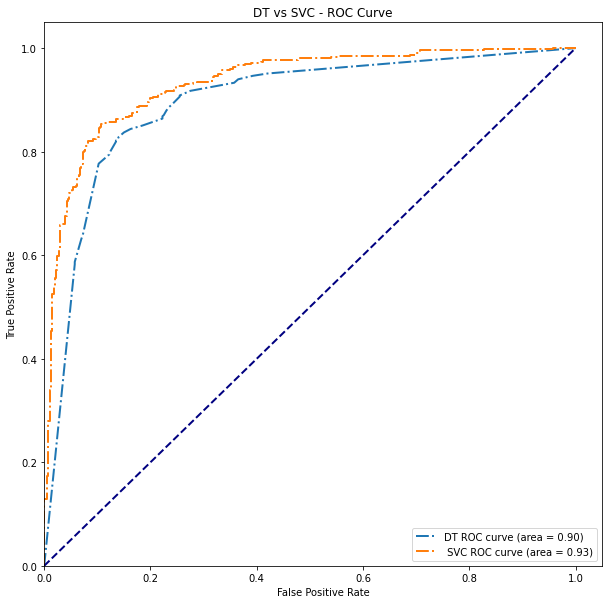

In [ ]:
# Calculate class probabilities
# Decision Tree
y_scores_dt = best_dt_clf.predict_proba(X_test)
# y_scores_dt = best_dt_clf.decision_function(X_test)
# Support Vector Classifier
# y_pred_proba_svc = best_svc_clf.predict_proba(X_test)
y_scores_svc = best_svc_clf.decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt[:, 1], pos_label='diseased')
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc, pos_label='diseased')

roc_auc_dt = auc(tpr_dt, fpr_dt)
roc_auc_svc = auc(tpr_svc, fpr_svc)

plt.figure(figsize=(10,10))

plt.plot(tpr_dt, fpr_dt, lw=2, marker='.', label='DT ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(tpr_svc, fpr_svc, lw=2, marker='.', label=' SVC ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT vs SVC - ROC Curve')
plt.legend(loc="lower right")
plt.show()
